## NLP with company reviews on Glassdoor

This capstone project is about helping companies/potential employee identify potential problems within a company. The business focus will be to help potential clients/companies get insights into the problems that existing or past employees faced within the company to reduce the turnover rate, solve potential mental health issues of employees and improve the image of the company. This could also assist the ministry of manpower or ministry with complaints filed by employees on employers for misconduct on determining if such issues has been flagged by other employees of the companies. These are just some of the use case of this project but not just limited to only the use case mentioned above.

#### Credit to Mathew Chatham for the scraper
This is to credit Matthew Chatham for the scraper in which he had created and shared on github. The scraper could not work immediately as the codes on glassdoor has changed over the time of 2 -3 years which he created the scraper. Some tweaks was done to update and remove fields that are not required. The link can be found here (https://github.com/MatthewChatham/glassdoor-review-scraper) 

In [1]:
import selenium
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
import re
import spacy

## Data Extraction

### Using the scraper to obtain the data and putting it into a DataFrame

In [ ]:
# using the code by Matthew after some updates was done to get the scraper to work

# this is to scrape 500 reviews from glassdoor of Tencent a china internet company
%run main.py --url "https://www.glassdoor.sg/Reviews/Tencent-Reviews-E38281.htm" --limit 500 -f tencent_reviews.csv

In [ ]:
# this is to scrape 500 reviews from glassdoor of Google a US internet company
%run main.py --url "https://www.glassdoor.sg/Reviews/Google-Reviews-E9079.htm" --limit 500 -f google_reviews.csv

In [2]:
# reading the csv file and assign the data to a variable in a dataframe
tencent_df = pd.read_csv('tencent_reviews.csv')
google_df = pd.read_csv('google_reviews.csv')

In [3]:
tencent_df.sample(10)

,employee_title,location,employee_status,review_title,pros,cons,rating_overall
377,Senior Product Manager,"Beijing, Beijing",31 May 2021,fine,"good culture, good people, good place to learn\n","heavy workload, nearly no WLB\nBe the first to...",4.0
279,Site Reliability Engineer,NaN,18 Oct 2021,Good benefit,Good benefit and care employees a lot\n,Still at a start-up like stage\nBe the first t...,4.0
426,Software Engineer,NaN,13 Apr 2021,no,"big company, high tech and salary\n","too tired, has no time to study\nBe the first ...",3.0
464,Front End Senior Developer,NaN,23 Feb 2021,recommend,1. RSU benefit\n2. extra medical insurance\n3....,1. WLB is not so good\nBe the first to find th...,4.0
308,Anonymous,"Palo Alto, CA",11 Oct 2021,Typical zombie giant with leadership level res...,"All kinds of perks, great medical insurance, e...","Hopeless company. The generation of old ""FI"" b...",1.0
298,Anonymous,NaN,2 Oct 2021,Working mechanism,Good way to China market\n,"Too many unnecessary working flow, and approva...",3.0
368,Marketing Assistant,Paris,18 Jun 2021,"creative,quickly,nice company","It is a united, creative, and young company. B...",It is exclusive in some areas and has no compe...,4.0
265,Associate Product Manager,"Shenzhen, Guangdong",1 Nov 2021,no work life balance,Big platform and big teams\n,"no work life balance, stressful sometimes\nBe ...",4.0
484,Recruiter,NaN,16 Jan 2021,Good Company,Supportive company culture. Love the teams wor...,"sometimes work overtime, average salary.\nBe t...",4.0
313,Senior Frontend Developer,"Shenzhen, Guangdong",12 Sept 2021,Good Company,* Good working environment\n* Good welfare\n,* The technology stack is a bit outdated\nBe t...,4.0


In [4]:
google_df.sample(10)

,employee_title,location,employee_status,review_title,pros,cons,rating_overall
404,Product Lead,Singapore,6 Aug 2017,Greatest place to work,"People to work with, scope of jobs and career ...",High internal and external competition for the...,5.0
234,Operations Manager,Singapore,15 Feb 2021,Great company,"Interesting problems to solve, benefits , sala...",Too big to feel lost or insignificant\nBe the ...,5.0
258,Software Engineer,Singapore,12 Jan 2021,Great place to work,Great place to work Great place to work\n,nothing to declare here etc\nBe the first to f...,5.0
389,Anonymous,NaN,2 Jun 2018,Sales,Good brand. Innovative. Nice colleagues and wi...,Silo. Need more collaboration. foster more tea...,4.0
57,Account Manager,NaN,11 Jan 2022,Great benefits and work culture,Cant complain about the insurance benefits\nIn...,Fast pace high performers everywherr\nBe the f...,5.0
348,Anonymous,NaN,13 Oct 2019,Great Place,Work culture is great and so is the pay\n,"Nothing as such, a great place to work\nBe the...",4.0
11,Software Engineer,NaN,21 Apr 2022,Great company,Everything others say are true\n,None so far for me\nBe the first to find this ...,5.0
118,Global Mobility Specialist,Singapore,21 Aug 2021,Great culture & people,Great culture and great people\n,nothing to add at this point\nBe the first to ...,5.0
8,Enginneering,NaN,13 May 2022,Good,Good welfare and office facilities\nGood compe...,Limited career growth \nNot applicable\nBe the...,3.0
295,Senior Recruiter,NaN,15 Sept 2020,Great company,"Benefits, culture, innovation, technology, glo...","Sometimes overly political, a lot of virtue si...",5.0


## Data Preprocessing

### Checking for nulls and datatype

In [5]:
tencent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   employee_title   500 non-null    object 
 1   location         306 non-null    object 
 2   employee_status  500 non-null    object 
 3   review_title     496 non-null    object 
 4   pros             498 non-null    object 
 5   cons             500 non-null    object 
 6   rating_overall   500 non-null    float64
dtypes: float64(1), object(6)
memory usage: 27.5+ KB


In [6]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   employee_title   485 non-null    object 
 1   location         280 non-null    object 
 2   employee_status  500 non-null    object 
 3   review_title     493 non-null    object 
 4   pros             484 non-null    object 
 5   cons             500 non-null    object 
 6   rating_overall   500 non-null    float64
dtypes: float64(1), object(6)
memory usage: 27.5+ KB


In [7]:
# changing datatype of column: employee_status
tencent_df['employee_status'] = tencent_df['employee_status'].astype('datetime64[ns]')
google_df['employee_status'] = google_df['employee_status'].astype('datetime64[ns]')

In [8]:
# check for nulls (tencent)
tencent_df.isnull().sum()

employee_title       0
location           194
employee_status      0
review_title         4
pros                 2
cons                 0
rating_overall       0
dtype: int64

In [9]:
# check for nulls (google)
google_df.isnull().sum()

employee_title      15
location           220
employee_status      0
review_title         7
pros                16
cons                 0
rating_overall       0
dtype: int64

In [10]:
# exploring the nulls in google employee title

google_df[google_df['employee_title'].isnull()]

,employee_title,location,employee_status,review_title,pros,cons,rating_overall
379,NaN,NaN,2018-10-26,Very Good working environment @ google,fun people to work with\n,work can be stressful at times\nBe the first t...,5.0
408,NaN,NaN,2017-04-10,My internship experience,- Diversity \n- Dynamic and helpful teams \n- ...,- sometimes you have short time to socialise w...,5.0
410,NaN,NaN,2017-02-23,Analyst,Great Place to work at !\n,Nothing that i can think of\nAdvice to Managem...,5.0
418,NaN,NaN,2016-10-01,Pros and Cons - Just Like Any Other Big Company,and,- Just Like Any Other Big Company\n1 Oct 2016 ...,3.0
422,NaN,NaN,2016-05-08,Selected for GSoC 2016,Adds value to your skillset and experience. Yo...,Should send at least two t-shirts and more goo...,5.0
425,NaN,"New York, NY",2016-02-14,Great environment!,A place where people come together and produce...,Needs more people to execute at times\nAdvice ...,4.0
426,NaN,NaN,2016-01-28,Online Advertising Specialist,"Awesome people, great benefits and loads of op...",It is not the best place to get promoted fast\...,5.0
427,NaN,NaN,2016-01-21,Business Manager,"smart colleagues, great transparent culture\n","extremely competitive, harder to advance given...",5.0
434,NaN,NaN,2015-08-14,Excellent company with limitless potential,"awesome food, awesome people, great benefits a...",everything revolves around Mountain View. hard...,5.0
445,NaN,NaN,2014-10-12,Amazing place to work,Smart folks and great stuff to do.\n,"long hours, pay is okay and could be higher\nB...",5.0


In [11]:
'''from the above, we can see that some of the null values of employee title can be found in the review title. So we will fill
the employee titles of these'''

# index no (408, 410, 426, 427, 458) impute with position found in review title

google_df.iloc[408, google_df.columns.get_loc('employee_title')] = 'Intern'
google_df.iloc[410, google_df.columns.get_loc('employee_title')] = 'Analyst'
google_df.iloc[426, google_df.columns.get_loc('employee_title')] = 'Online Advertising Specialist'
google_df.iloc[427, google_df.columns.get_loc('employee_title')] = 'Business Manager'
google_df.iloc[458, google_df.columns.get_loc('employee_title')] = 'Industry Analyst Intern'

In [12]:
# remaining nulls in employee title after imputing the title
google_df[google_df['employee_title'].isnull()]

,employee_title,location,employee_status,review_title,pros,cons,rating_overall
379,NaN,NaN,2018-10-26,Very Good working environment @ google,fun people to work with\n,work can be stressful at times\nBe the first t...,5.0
418,NaN,NaN,2016-10-01,Pros and Cons - Just Like Any Other Big Company,and,- Just Like Any Other Big Company\n1 Oct 2016 ...,3.0
422,NaN,NaN,2016-05-08,Selected for GSoC 2016,Adds value to your skillset and experience. Yo...,Should send at least two t-shirts and more goo...,5.0
425,NaN,"New York, NY",2016-02-14,Great environment!,A place where people come together and produce...,Needs more people to execute at times\nAdvice ...,4.0
434,NaN,NaN,2015-08-14,Excellent company with limitless potential,"awesome food, awesome people, great benefits a...",everything revolves around Mountain View. hard...,5.0
445,NaN,NaN,2014-10-12,Amazing place to work,Smart folks and great stuff to do.\n,"long hours, pay is okay and could be higher\nB...",5.0
446,NaN,NaN,2014-10-10,"Gd perks and great colleagues, fun loving and ...",Good perks and great colleagues\n,Night calls all the time\nAdvice to Management...,4.0
448,NaN,NaN,2014-08-20,Awesome,Good work life balance. Plenty of room to grow.\n,"Salary not too attractive. That said, benefits...",4.0
451,NaN,NaN,2014-01-07,Great company. Excellent work environment.,Free food. Excellent office location. Smart & ...,"Long days, working for global company means mu...",4.0
453,NaN,NaN,2013-10-03,All that glitters is not gold (YouTube),All the usual (i) Lifestyle (ii) Perks (iii) F...,I work at YouTube. It is run like an army camp...,1.0


In [13]:
# as for the other missing employee title, we will instead fillna as "Anonymous"
google_df['employee_title'].fillna('Anonymous', inplace = True)

In [14]:
# check if there is any more nulls in employee title
google_df[google_df['employee_title'].isnull()]

,employee_title,location,employee_status,review_title,pros,cons,rating_overall


In [15]:
# using SimpleImputer with strategy set to most_frequent to impute NaN location to the most common

imputer = SimpleImputer(strategy='most_frequent')
google_df['location'] = imputer.fit_transform(google_df[['location']])
tencent_df['location'] = imputer.fit_transform(tencent_df[['location']])

In [16]:
# setting up a new column for only year of the review
tencent_df['review_year'] = pd.DatetimeIndex(tencent_df['employee_status']).year
google_df['review_year'] = pd.DatetimeIndex(google_df['employee_status']).year

In [17]:
# removing employee_status (exact date of the review)

tencent_df.drop(columns='employee_status', inplace=True)
google_df.drop(columns='employee_status', inplace=True)

In [18]:
# fill text columns that have nan as blank
tencent_df['review_title'].fillna('', inplace=True)
google_df['review_title'].fillna('', inplace=True)

tencent_df['pros'].fillna('', inplace=True)
google_df['pros'].fillna('', inplace=True)

In [19]:
tencent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   employee_title  500 non-null    object 
 1   location        500 non-null    object 
 2   review_title    500 non-null    object 
 3   pros            500 non-null    object 
 4   cons            500 non-null    object 
 5   rating_overall  500 non-null    float64
 6   review_year     500 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 27.5+ KB


In [20]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   employee_title  500 non-null    object 
 1   location        500 non-null    object 
 2   review_title    500 non-null    object 
 3   pros            500 non-null    object 
 4   cons            500 non-null    object 
 5   rating_overall  500 non-null    float64
 6   review_year     500 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 27.5+ KB


#### Random check on the text from title, pros and cons. Notice that there are some columns that have cons written in pros and vice versa. Therefore, we will combine all the 3 columns into 1 instead of treating them separately.

In [21]:
# concatanate all text columns into 1 columns

tencent_df['title_pros_cons'] = tencent_df['review_title'] + '. ' + tencent_df['pros'] + '. ' + tencent_df['cons']
google_df['title_pros_cons'] = google_df['review_title'] + '. ' + google_df['pros'] + '. ' + google_df['cons']

In [22]:
# dropping previous columns that were combined
tencent_df.drop(columns=['review_title', 'pros', 'cons'], inplace=True)
google_df.drop(columns=['review_title', 'pros', 'cons'], inplace=True)

In [23]:
google_df.sample(10)

,employee_title,location,rating_overall,review_year,title_pros_cons
232,Industry Manager,Singapore,1.0,2021,"Politics, politics, and politics. - talented c..."
401,Recruiter,Singapore,1.0,2017,"Used to be great, now just a normal corporate...."
342,Recruiting Coordinator,Singapore,5.0,2019,Recruiter. Nice people and interesting work / ...
454,Business Development Manager,Singapore,4.0,2013,"An innovative, fast paced, collaborative work ..."
373,Anonymous,Singapore,5.0,2019,Business Development Manager. Get exposure to ...
21,Software Engineer,Singapore,4.0,2022,Good i learn allt there. Fun i learnt alot the...
369,Account Strategist,Singapore,5.0,2019,"Great. people, perks, job scope, great manager..."
484,Searcher,Singapore,5.0,2022,Searcher. Really good company to work with.\n....
224,Marketing Manager,Singapore,4.0,2021,". Good working environment, good brand name\n...."
79,Anonymous,Singapore,5.0,2021,"great!. very welcoming, staff is all friendly\..."


In [86]:
tencent_df.sample(10)

,employee_title,location,rating_overall,review_year,title_pros_cons,title_pros_cons_nostop,after_lemma
31,Anonymous,"Shenzhen, Guangdong",5.0,2021,"(overall, great, place, to, work, with, good, culture, need, to, manage, a, lot, of, ad, hoc, tasks)","[overall, great, place, work, good, culture, need, manage, lot, ad, hoc, tasks]","[overall, great, place, work, good, culture, need, manage, lot, ad, hoc, task]"
464,Front End Senior Developer,"Shenzhen, Guangdong",4.0,2021,"(recommend, 1, rsu, benefit2, extra, medical, insurance3, above, average, salary, 1, wlb, is, not, so, good)","[recommend, 1, rsu, benefit2, extra, medical, insurance3, average, salary, 1, wlb, good]","[recommend, 1, rsu, benefit2, extra, medical, insurance3, average, salary, 1, wlb, good]"
64,Data Scientist,"Shenzhen, Guangdong",4.0,2022,"(review, of, tencent, good, atmospheregood, benefits, and, salary, no, significant, cons, i, am, satisfiedttencent, responsethank, you, glad, to, hear, that, you, have, had, a, positive, experience, with, us)","[review, tencent, good, atmospheregood, benefits, salary, significant, cons, satisfiedttencent, responsethank, glad, hear, positive, experience]","[review, tencent, good, atmospheregood, benefit, salary, significant, con, satisfiedttencent, responsethank, glad, hear, positive, experience]"
459,"Senior Manager, Operations","Palo Alto, CA",4.0,2021,"(good, place, to, work, competitive, salary, good, benefits, lots, of, care, from, hr, during, pandemic, holiday, packages, office, supply, and, wellness, reimbursement, fast, paced, great, company, with, a, diverse, set, of, product, portfolios, for, you, to, find, the, thing, you, want, to, work, on, long, hours, working, with, china, at, night, are, totally, normal, advice, to, managementmore, trannsparancy)","[good, place, work, competitive, salary, good, benefits, lots, care, hr, pandemic, holiday, packages, office, supply, wellness, reimbursement, fast, paced, great, company, diverse, set, product, portfolios, find, thing, want, work, long, hours, working, china, night, totally, normal, advice, managementmore, trannsparancy]","[good, place, work, competitive, salary, good, benefit, lot, care, hr, pandemic, holiday, package, office, supply, wellness, reimbursement, fast, pace, great, company, diverse, set, product, portfolio, find, thing, want, work, long, hour, work, china, night, totally, normal, advice, managementmore, trannsparancy]"
404,Project Manager,"Palo Alto, CA",2.0,2021,"(will, not, recommend, unless, desperate, for, visa, sponsorship, stable, paychecks, and, benefit, tencent, will, not, go, anywhere, in, years, poor, wlb, a, lot, of, political, games, culture, shocks, not, applicable, to, locals, but, for, visa, seekers, will, be, paid, heavily, under, market, especially, for, non, engineer, positions, all, the, issues, of, a, chinese, company, s, oversea, office, you, can, image, of)","[recommend, desperate, visa, sponsorship, stable, paychecks, benefit, tencent, years, poor, wlb, lot, political, games, culture, shocks, applicable, locals, visa, seekers, paid, heavily, market, especially, non, engineer, positions, issues, chinese, company, s, oversea, office, image]","[recommend, desperate, visa, sponsorship, stable, paycheck, benefit, tencent, year, poor, wlb, lot, political, game, culture, shock, applicable, local, visa, seeker, pay, heavily, market, especially, non, engineer, position, issue, chinese, company, s, oversea, office, image]"
393,Bio Statistician,"Columbus, OH",1.0,2021,"(bonus, their, bonus, pretty, high, for, me, they, didn, t, pay, me, bonus)","[bonus, bonus, pretty, high, didn, t, pay, bonus]","[bonus, bonus, pretty, high, didn, t, pay, bonus]"
8,Anonymous,"Shenzhen, Guangdong",4.0,2022,"(quite, decent, workplace, company, values, are, overall, quite, good, colleagues, overall, are, young, nice, and, energetic, people, still, new, to, its, internationalization)","[decent, workplace, company, values, overall, good, colleagues, overall, yo

## Exploratory Data Analysis
### Ratings

Text(0, 0.5, 'Number of Ratings')

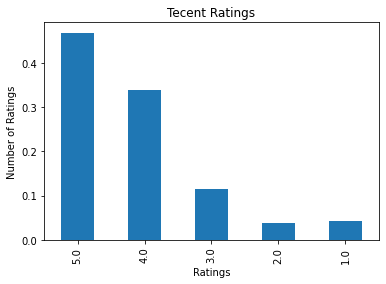

In [25]:
# looking ratings of the review

tencent_df['rating_overall'].value_counts(normalize=True).sort_index(level='rating_overall', ascending=False).plot(kind='bar')
plt.title('Tecent Ratings')
plt.xlabel('Ratings')
plt.ylabel('Number of Ratings')

In [26]:
# the distribution of 5.0 + 4.0 ratings
tencent_df['rating_overall'].value_counts(normalize=True).sort_index(level='rating_overall', ascending=False)

5.0    0.468
4.0    0.338
3.0    0.114
2.0    0.038
1.0    0.042
Name: rating_overall, dtype: float64

Text(0, 0.5, 'Number of Ratings')

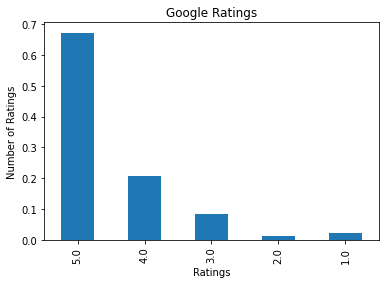

In [27]:
google_df['rating_overall'].value_counts(normalize=True).sort_index(level='rating_overall', ascending=False).plot(kind='bar')
plt.title('Google Ratings')
plt.xlabel('Ratings')
plt.ylabel('Number of Ratings')

In [28]:
google_df['rating_overall'].value_counts(normalize=True).sort_index(level='rating_overall', ascending=False)

5.0    0.672
4.0    0.208
3.0    0.084
2.0    0.012
1.0    0.024
Name: rating_overall, dtype: float64

#### Google had a better rating score at 88% of score between 4 - 5 compared to Tencent at 80.6% of score between 4 - 5 

###  Employee Title

Text(0.5, 0, 'Count')

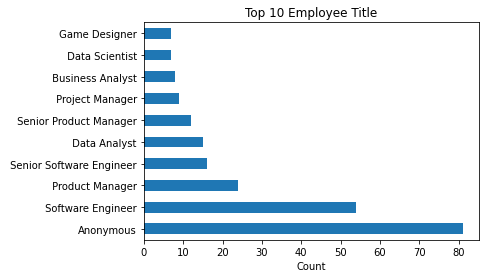

In [29]:
# Tencent Employee Title
tencent_df['employee_title'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Employee Title')
plt.xlabel('Count')

Text(0.5, 0, 'Count')

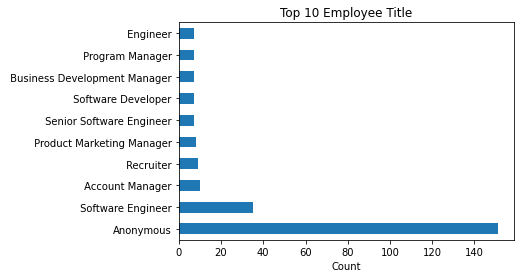

In [30]:
# Google Employee Title
google_df['employee_title'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Employee Title')
plt.xlabel('Count')

### Location

<AxesSubplot:>

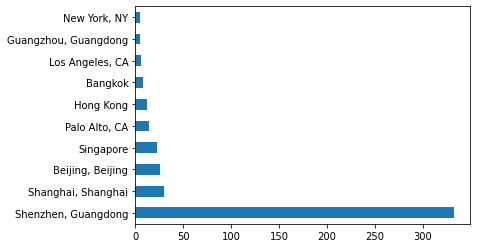

In [31]:
# tencent location
tencent_df['location'].value_counts().head(10).plot(kind='barh')

<AxesSubplot:>

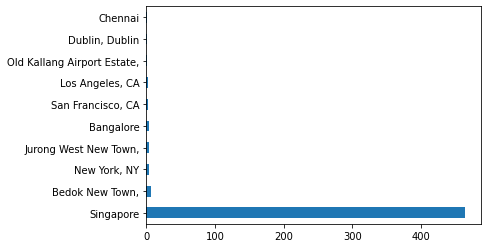

In [32]:
# google location
google_df['location'].value_counts().head(10).plot(kind='barh')

### Year of written review

Text(0.5, 1.0, 'Distribution of reviews over the years')

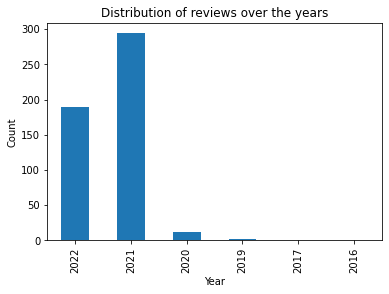

In [33]:
# written reviews over the years (tencent)
tencent_df['review_year'].value_counts().sort_index(level='review_year', ascending=False).plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of reviews over the years')

Text(0.5, 1.0, 'Distribution of reviews over the years')

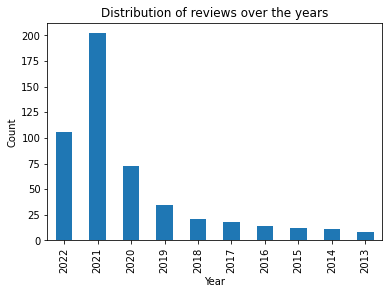

In [34]:
# written reviews over the years (google)
google_df['review_year'].value_counts().sort_index(level='review_year', ascending=False).plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of reviews over the years')

#### Google started having reviews earlier than Tencent understandably as it is a English platform. Tencent only started their presence in 2016, 3 years later than Google. 

# Pre-processing part 2
## Cleaning the text of unecessary words or symbols, lower case all the words

In [35]:
# helper function to clean the data for 

def clean_text(text):
    # remove the text that is not part of the actual comments
    pattern1 = re.compile(r'\nBe\sthe\sfirst.+')
    text = pattern1.sub(r'',text)
    pattern2 = re.compile(r'\d\speople\sfound\sthis.+')
    text = pattern2.sub(r'',text)
    pattern3 = re.compile(r'\d\sperson\sfound.+')
    text = pattern3.sub(r'',text)
    pattern4 = re.compile(r'\nHelpful\nShare\nRepor')
    text = pattern4.sub(r'',text)
    
    # remove "/n"
    pattern5 = re.compile(r'\n')
    text = pattern5.sub(r'',text)
    # remove irrelevant character such as numbers and punctuation
    pattern6 = re.compile(r'[^a-zA-Z0-9]')
    text = pattern6.sub(r' ',text)
    # remove extra whitespaces
    pattern7= re.compile(r'^\s*|\s\s*')
    text = pattern7.sub(r' ', text).strip()
    # text to all lower case
    text = text.lower()
    
    return text

In [36]:
# running the helper function to clean both google and tencent dataset

tencent_df['title_pros_cons'] = tencent_df['title_pros_cons'].map(lambda x: clean_text(str(x)))
google_df['title_pros_cons'] = google_df['title_pros_cons'].map(lambda x: clean_text(str(x)))

In [73]:
tencent_df.sample(10)

,employee_title,location,rating_overall,review_year,title_pros_cons,title_pros_cons_nostop,after_lemma
214,Team Leader,"Shenzhen, Guangdong",5.0,2021,"(great, place, to, work, the, workplace, is, great, people, are, nice, some, of, the, managers, are, not, very, professional)","[great, place, work, workplace, great, people, nice, managers, professional]","[great, place, work, workplace, great, people, nice, manager, professional]"
422,Software Engineer,"Shenzhen, Guangdong",5.0,2021,"(no, no, no, no, no, no, salary, is, low, salary, is, low, salary, is, low)","[salary, low, salary, low, salary, low]","[salary, low, salary, low, salary, low]"
174,Intern,"China, ME",5.0,2022,"(intern, good, work, with, good, people, and, ceo, none, not, alot, of, cons, to, be, honest, ttencent, responsethanks, glad, to, hear, you, had, a, good, experience, with, us)","[intern, good, work, good, people, ceo, alot, cons, honest, ttencent, responsethanks, glad, hear, good, experience]","[intern, good, work, good, people, ceo, alot, con, honest, ttencent, responsethank, glad, hear, good, experience]"
256,Software Developer,"Burnaby, BC",5.0,2021,"(top, 2, 1, the, system, is, more, humane2, high, industry, recognition3, friendly, working, atmosphere, difficulties, in, inter, departmental, cooperationfactional, cultureadvice, to, managementgrasp, the, business, directionwage, increaseissue, stock)","[2, 1, system, humane2, high, industry, recognition3, friendly, working, atmosphere, difficulties, inter, departmental, cooperationfactional, cultureadvice, managementgrasp, business, directionwage, increaseissue, stock]","[2, 1, system, humane2, high, industry, recognition3, friendly, work, atmosphere, difficulty, inter, departmental, cooperationfactional, cultureadvice, managementgrasp, business, directionwage, increaseissue, stock]"
13,Software Engineer,"Shenzhen, Guangdong",5.0,2022,"(good, goodgoodgoodgoodgoodgoodgoodgoodfriendly, friendlyfriendly, friendlyfriendlyhigh, salaryhigh, bonus, nothingnothing, anothing, b, nothing, cnothing, dnothing, e)","[good, goodgoodgoodgoodgoodgoodgoodgoodfriendly, friendlyfriendly, friendlyfriendlyhigh, salaryhigh, bonus, nothingnothing, anothing, b, cnothing, dnothing, e]","[good, goodgoodgoodgoodgoodgoodgoodgoodfriendly, friendlyfriendly, friendlyfriendlyhigh, salaryhigh, bonus, nothingnothe, anothe, b, cnothe, dnothe, e]"
359,Game Designer,"Beijing, Beijing",5.0,2021,"(good, food, a, lot, of, games, long, working, hours, female, and, male, unbalanced)","[good, food, lot, games, long, working, hours, female, male, unbalanced]","[good, food, lot, game, long, work, hour, female, male, unbalanced]"
236,Business Analyst,"Shenzhen, Guangdong",5.0,2021,"(business, analyst, very, cool, and, well, balanced, very, hard, to, enter, tbh)","[business, analyst, cool, balanced, hard, enter, tbh]","[business, analyst, cool, balance, hard, enter, tbh]"
118,Director,Hong Kong,1.0,2022,"(good, for, cv, but, really, underdeveloped, company, headquarters, with, canteen, and, entertainment, looks, fancy, good, perks, and, benefits, top, down, boss, pleasing, culture, no, clear, kpi, a, lot, of, idle, people, taking, credits, for, others, work, internal, competition, unclear, job, scope, no, work, life, balanceadvice, to, managementdefine, roles, before, hiring, look, at, people, s, capability, make, data, driven, decisions)","[good, cv, underdeveloped, company, headquarters, canteen, entertainment, looks, fancy, good, perks, benefits, boss, pleasing, culture, clear, kpi, lot, idle, people, taking, credits, work, internal, competition, unclear, job, scope, work, life, balanceadvice, managementdefine, roles, hiring, look, people, s, capability, data, driven, decisions]","[good, cv, underdeveloped, company, headquarters, canteen, entertainment, look, fancy, good, perk, benefit, boss, pleasing, culture, clear, kpi, lot, idle, people, take, credit, work, internal, competition, unclear, job, scope, work, life, balanceadvice, managementdefine

In [75]:
google_df.sample(10)

,employee_title,location,rating_overall,review_year,title_pros_cons,title_pros_cons_nostop,after_lemma
146,Anonymous,Singapore,4.0,2021,"(google, sg, bright, people, opportunity, to, innovate, and, work, on, projects, you, are, passionate, about, too, many, bright, people, perf, can, be, a, blood, sport, distributed, site)","[google, sg, bright, people, opportunity, innovate, work, projects, passionate, bright, people, perf, blood, sport, distributed, site]","[google, sg, bright, people, opportunity, innovate, work, project, passionate, bright, people, perf, blood, sport, distribute, site]"
204,Regional Client Lead,Singapore,4.0,2021,"(good, company, but, not, dreamland, great, benefit, possibility, of, advancement, management, and, directors, are, completely, shielded, from, any, negative, comments, by, the, hr, department, and, it, is, a, highly, political, organization)","[good, company, dreamland, great, benefit, possibility, advancement, management, directors, completely, shielded, negative, comments, hr, department, highly, political, organization]","[good, company, dreamland, great, benefit, possibility, advancement, management, director, completely, shield, negative, comment, hr, department, highly, political, organization]"
9,Account Manager,Singapore,5.0,2022,"(great, working, environment, fun, to, work, with, anyone, too, much, info, need, to, pick, and, choose)","[great, working, environment, fun, work, info, need, pick, choose]","[great, working, environment, fun, work, info, need, pick, choose]"
129,Program Manager,Singapore,5.0,2021,"(great, place, to, work, for, great, company, no, issues, no, issues, its, a, great, company, to, work, for)","[great, place, work, great, company, issues, issues, great, company, work]","[great, place, work, great, company, issue, issue, great, company, work]"
490,Software Engineer,Singapore,5.0,2022,"(still, an, amazing, place, to, work, beware, of, entitlement, 1, great, work, life, balance, there, s, not, many, companies, i, know, that, have, a, consistent, a, 40hr, work, week, and, pay, top, salary, 2, cool, projects, to, work, on, good, balance, between, research, development, see, caveats, below, though, 3, supportive, healthy, psychologically, safe, work, environment, google, cares, a, ton, about, how, we, work, and, how, we, work, together, the, bottom, up, culture, also, means, that, we, have, a, lot, of, self, determination, and, don, t, feel, like, we, re, at, the, mercy, of, our, management, 4, super, easy, internal, mobility, ...)","[amazing, place, work, beware, entitlement, 1, great, work, life, balance, s, companies, know, consistent, 40hr, work, week, pay, salary, 2, cool, projects, work, good, balance, research, development, caveats, 3, supportive, healthy, psychologically, safe, work, environment, google, cares, ton, work, work, culture, means, lot, self, determination, don, t, feel, like, mercy, management, 4, super, easy, internal, mobility, lots, change, teams, couple, years, google, different, types, work, won, t, feel, stuck, long, like, working, google, overall, ll, able, find, interesting, 5, s, google, having, google, resume, opens, doors, opportunities, s, great, networking, generally, colleagues, field, 1, entitlement, literally, 5x, dreamt, comp, insane, ...]","[amazing, place, work, beware, entitlement, 1, great, work, life, balance, s, company, know, consistent, 40hr, work, week, pay, salary, 2, cool, project, work, good, balance, research, development, caveat, 3, supportive, healthy, psychologically, safe, work, environment, google, care, ton, work, work, culture, mean, lot, self, determination, don, t, feel, like, mercy, management, 4, super, easy, internal, mobility, lot, change, team, couple, year, google, different, type, work, win, t, feel, stick, long, like, work, google, overall, ll, able, find, interesting, 5, s, google, have, google, resume, open, door, opportunity, s, great, network, generally, colleague, field, 1, entitlement, literally, 

## Tokenizing, removing stopwords and lemmatizing

In [62]:
pd.set_option('display.max_colwidth', 999)

In [39]:
# load spacy small english models
nlp = spacy.load('en_core_web_sm')

In [72]:
# function to remove stopwords
def remove_stopwords(text):
    text = [token for token in text if not token.is_stop]
    return text

# function to lemmatize
def lemmatize(text):
    text = [token.lemma_ for token in text]
    return text

# combine function to perform both removal stopwords and lemmatizing
def combine(text):
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = pos_tag(text)
    return text

In [41]:
# applying the spacy model to tokenize the sentence
google_df['title_pros_cons'] = google_df['title_pros_cons'].apply(lambda x: nlp(x))
tencent_df['title_pros_cons'] = tencent_df['title_pros_cons'].apply(lambda x: nlp(x))

In [66]:
# using the combine to do removal stopwords and lemmatizing
google_df['after_lemma'] = google_df['title_pros_cons'].apply(lambda x: combine(x))
tencent_df['after_lemma'] = tencent_df['title_pros_cons'].apply(lambda x: combine(x))

In [85]:
test = nlp('good, really, good, compensation, and, benefits, nothing, much, to, talk, about')
for token in test.noun_chunks:
    print(token.text)

In [ ]:
from collection import Counter

word_freq = Counter()

### LDA Topic Modeling

In [ ]:
from gensim.corpora.dictionary import Dictionary

# set pros and cons from dataframe into variables
tencent_pros = tencent_df['pros']
tencent_cons = tencent_df['cons']
google_pros = google_df['pros']
google_cons = google_df['cons']